# Min cut

This notebook contains an implementation of the Karger 1995 contraction algorithm for min cut.

In [18]:
# %matplotlib widget
# %matplotlib inline

import random
import numpy as np
from networkx.generators.random_graphs import erdos_renyi_graph
import networkx as nx
import matplotlib.pyplot as plt
from dataclasses import dataclass
from enum import Enum, StrEnum
import math

In [86]:
n = 30
k = 4
p = 0.2
graph = nx.MultiGraph(nx.connected_watts_strogatz_graph(n,k,p))
pos = nx.spring_layout(graph, seed=1)


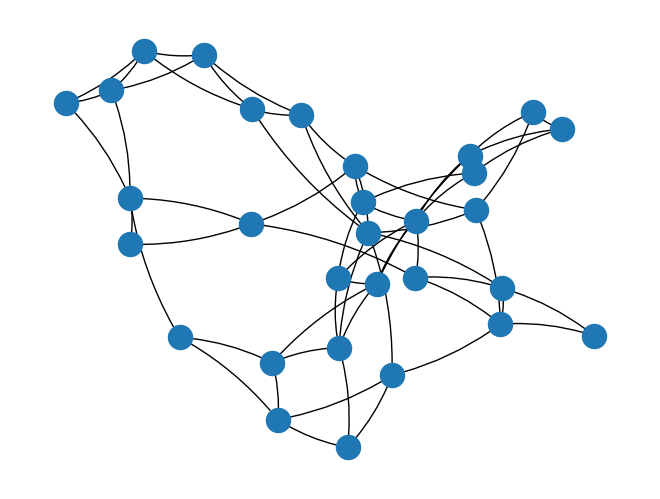

In [107]:
nx.draw(graph, pos, connectionstyle="arc3, rad=0.1", arrows=True)

In [103]:
def duplicate_p_edges(graph, p):
    n_edges = len(graph.edges)
    edges_to_add = math.floor(p * n_edges)
    edges = random.sample(list(graph.edges), edges_to_add)
    graph.add_edges_from(edges)



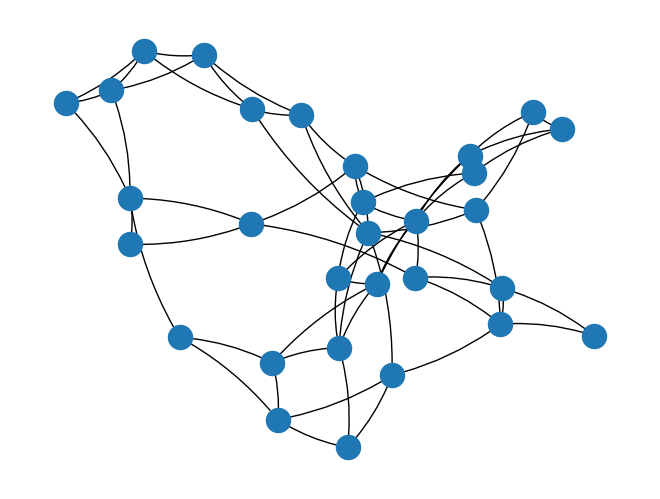

In [109]:
duplicate_p_edges(graph, 0.6)
nx.draw(graph,pos=pos, connectionstyle="arc3, rad = 0.1", arrows=True)

In [129]:
# contract graph while there are more than two nodes
def karger(graph):
    G = graph.copy()
    while (len(G.nodes) > 2):
        edge = random.choice(list(G.edges))
        nx.contracted_edge(G, edge, self_loops=False, copy=False)
    nodes = list(G.nodes)
    edges = list(G.edges)
    return edges

In [130]:
print(karger(graph))

[(0, 20, 0), (0, 20, 1), (0, 20, 2)]


In [139]:
def min_cut(graph):
    n = len(graph.nodes)
    cut = karger(graph)
    n_cut = len(cut)
    for i in range(100):
        new_cut = karger(graph)
        new_n_cut = len(new_cut)
        if (new_n_cut < n_cut):
            cut = new_cut
            n_cut = new_n_cut
    return n_cut, cut

In [142]:
min_cut(graph)

(2, [(0, 7, 0), (0, 7, 1)])